# Extracting Titanic Data Explanations in AIME (Only for those who have signed a non-disclosure agreement and/or paid a license fee.)
- This is an example of a program that uses AIME to produce global feature importance for titanic data.
- If you use this software for research or other purposes, please cite the following paper
```
@article{nakanishi2026bayesianaime,
  author  = {Takafumi Nakanishi},
  title   = {Bayesian-AIME: Quantifying Uncertainty and Enhancing Stability in Approximate Inverse Model Explanations},
  journal = {IEEE Access},
  year    = {2026},
  note    = {Accepted for publication}
}
```

- AIME is dual-licensed under the The 2-Clause BSD License and the Commercial License. Apply the The 2-Clause BSD License only for academic or research purposes, and apply Commercial License for commercial and other purposes. You can choose which one to use.
- For those interested in Commercial License, a licensing fee may be required. Please contact us for more details at: Email: takafumi@eigenbeats.com




## Intrallation

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install aime_xai

## Titanic dataset reading

In [3]:
import pandas as pd
import numpy as np
titanic_df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Research/AIME/preparation/titanic.csv', header=0, sep=',')
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


### Check for missing values

In [4]:
titanic_df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,263
SibSp,0
Parch,0
Ticket,0
Fare,1


In [5]:
titanic_df['Age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  , 22.5 ,
       18.5 , 67.  , 76.  , 26.5 , 60.5 , 11.5 ,  0.33,  0.17, 38.5 ])

In [6]:
titanic_df['Age'].median()

28.0

### Processing missing values

In [7]:
titanic_df["Age"] = titanic_df["Age"].fillna(titanic_df["Age"].median())

In [8]:
titanic_df['Embarked'].value_counts()

,count
Embarked,
S,914
C,270
Q,123


In [9]:
titanic_df["Embarked"] = titanic_df["Embarked"].fillna("S")

In [10]:
titanic_df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,1


In [11]:
titanic_df['Fare'].unique()

array([  7.25  ,  71.2833,   7.925 ,  53.1   ,   8.05  ,   8.4583,
        51.8625,  21.075 ,  11.1333,  30.0708,  16.7   ,  26.55  ,
        31.275 ,   7.8542,  16.    ,  29.125 ,  13.    ,  18.    ,
         7.225 ,  26.    ,   8.0292,  35.5   ,  31.3875, 263.    ,
         7.8792,   7.8958,  27.7208, 146.5208,   7.75  ,  10.5   ,
        82.1708,  52.    ,   7.2292,  11.2417,   9.475 ,  21.    ,
        41.5792,  15.5   ,  21.6792,  17.8   ,  39.6875,   7.8   ,
        76.7292,  61.9792,  27.75  ,  46.9   ,  80.    ,  83.475 ,
        27.9   ,  15.2458,   8.1583,   8.6625,  73.5   ,  14.4542,
        56.4958,   7.65  ,  29.    ,  12.475 ,   9.    ,   9.5   ,
         7.7875,  47.1   ,  15.85  ,  34.375 ,  61.175 ,  20.575 ,
        34.6542,  63.3583,  23.    ,  77.2875,   8.6542,   7.775 ,
        24.15  ,   9.825 ,  14.4583, 247.5208,   7.1417,  22.3583,
         6.975 ,   7.05  ,  14.5   ,  15.0458,  26.2833,   9.2167,
        79.2   ,   6.75  ,  11.5   ,  36.75  ,   7.7958,  12.5

In [12]:
titanic_df=titanic_df.dropna(subset=['Fare'])

In [13]:
titanic_df=titanic_df.reset_index()

In [14]:
titanic_df.isnull().sum()

,0
index,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0


In [15]:
titanic_df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

### Feature selection
- Narrow down to only the objective variable "Survived" and the explanatory variables "Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", and "Embarked".

In [16]:
ind_features=['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']
dep_features=['Survived']
features=dep_features+ind_features
categorical_features=['Pclass','Sex','Embarked']

titanic_df2=titanic_df.loc[:, features]
titanic_df2

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
1303,0,3,male,28.0,0,0,8.0500,S
1304,1,1,female,39.0,0,0,108.9000,C
1305,0,3,male,38.5,0,0,7.2500,S
1306,0,3,male,28.0,0,0,8.0500,S


### Convert categorical data to One-Hot Vector
- Pclass, Sex, and Embarked items converted to numeric values
- AIME needs to convert categorical data to One-Hot Vector

In [17]:
print(titanic_df2.isnull().sum())

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


In [18]:
from sklearn.preprocessing import OneHotEncoder

titanic_data = titanic_df2.copy()
encoder = OneHotEncoder(sparse_output=False)

columns_to_encode = ['Pclass', 'Sex', 'Embarked']
one_hot = encoder.fit_transform(titanic_data[columns_to_encode])
feature_names = encoder.get_feature_names_out(columns_to_encode)
one_hot_df = pd.DataFrame(one_hot, columns=feature_names)
titanic_data = titanic_data.drop(columns_to_encode, axis=1)
titanic_data = pd.concat([titanic_data, one_hot_df], axis=1)

In [19]:
titanic_data

,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,1,0,7.2500,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,1,38.0,1,0,71.2833,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,1,26.0,0,0,7.9250,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,1,35.0,1,0,53.1000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0,35.0,0,0,8.0500,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1303,0,28.0,0,0,8.0500,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1304,1,39.0,0,0,108.9000,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1305,0,38.5,0,0,7.2500,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1306,0,28.0,0,0,8.0500,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [20]:
column_features=titanic_data.columns[1:].values
column_features

array(['Age', 'SibSp', 'Parch', 'Fare', 'Pclass_1', 'Pclass_2',
       'Pclass_3', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q',
       'Embarked_S'], dtype=object)

### Set the objective variable to y and the explanatory variable to X

In [21]:
X=titanic_data.loc[:, column_features].values
X

array([[22. ,  1. ,  0. , ...,  0. ,  0. ,  1. ],
       [38. ,  1. ,  0. , ...,  1. ,  0. ,  0. ],
       [26. ,  0. ,  0. , ...,  0. ,  0. ,  1. ],
       ...,
       [38.5,  0. ,  0. , ...,  0. ,  0. ,  1. ],
       [28. ,  0. ,  0. , ...,  0. ,  0. ,  1. ],
       [28. ,  1. ,  1. , ...,  1. ,  0. ,  0. ]])

In [22]:
y=titanic_data['Survived'].values
y

array([0, 1, 1, ..., 0, 0, 0])

### Separate training data from test data

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Create a black box model
- Using a machine learning method called LightGBM, we will build a model that predicts whether a person will live or die given new "'Pclass','Sex','Age','SibSp','Parch','Fare','Embarked'" values.

In [24]:
import lightgbm as lgb
model = lgb.LGBMClassifier()

model.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 383, number of negative: 663
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000962 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 319
[LightGBM] [Info] Number of data points in the train set: 1046, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.366157 -> initscore=-0.548740
[LightGBM] [Info] Start training from score -0.548740


LGBMClassifier()

In [25]:
from sklearn.metrics import accuracy_score

y_pred=model.predict(X_test)
accuracy_score(y_test, y_pred)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


0.8625954198473282

### Did Rose and Jack survive the movie Titanic?
- This is Authors's memory and guess, so it could be wrong.
  - 'Pclass','Sex','Age','SibSp','Parch','Fare','Embarked'
  - Passenger Class(Pclass): 1 for Rose, 3 for Jack
  - Sex: 0 for Rose, 1 for Jack
  - Age: 17 for Rose, 19 for Jack
  - Number of siblings (SibSp): 0 for Rose, 0 for Jack
  - Number of parents and children (Parch): 1 for Rose, 0 for Jack
  - Fare (Fare): Rose does not know, so she enters the average; Jack enters 0 (he won a poker bet and got on for free).
  - Port of embarkation: I don't know about Rose or Jack, but I'll put 0.

In [26]:
#Age    SibSp   Parch   Fare    Pclass_1        Pclass_2        Pclass_3        Sex_female      Sex_male        Embarked_C      Embarked_Q      Embarked_S

data=np.array([[17,0,1,titanic_data['Fare'].mean(),1,0,0,1,0,0,0,0],
               [19,0,0,0,0,0,1,0,1,0,0,0]])

In [27]:
data.shape

(2, 12)

In [28]:
import pandas as pd
role=['Rose','Jack']
# Exclude 'Embarked_nan' from the column features as it's not in the data
movie_titanic = pd.DataFrame(data,
                  columns=column_features[column_features != 'Embarked_nan'],
                  index=role)
movie_titanic

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
Rose,17.0,0.0,1.0,33.295479,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
Jack,19.0,0.0,0.0,0.000000,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [29]:
movie_titanic.loc['Jack'].values

array([19.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.])

In [30]:
movie_titanic.loc['Rose'].values

array([17.        ,  0.        ,  1.        , 33.29547928,  1.        ,
        0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
        0.        ,  0.        ])

In [31]:
result=model.predict_proba([movie_titanic.loc['Rose'].values])
result

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


array([[0.00281389, 0.99718611]])

In [32]:
result=model.predict_proba([movie_titanic.loc['Jack'].values])
result

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


array([[0.97217415, 0.02782585]])

- Rose survived and Jack died, which is the same ending as in the movie.
- However, no explanation is given as to why Rose survived and why Jack died.

## Visualization of rationale explanation by Bayesian-AIME

In [33]:
from aime_xai import AIME

In [34]:
y_hat_train=model.predict_proba(X_train)
y_hat_test=model.predict_proba(X_test)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [35]:
explainer = AIME(use_bayesian=True)
explainer.create_explainer(X_train, y_hat_train, normalize=True)

In [36]:
explainer.A_dagger.shape

(12, 2)

In [37]:
explainer.A_dagger

array([[ 0.06708361, -0.11607188],
       [ 0.00590092, -0.01021011],
       [-0.11382642,  0.19694896],
       [-0.24260431,  0.4197678 ],
       [-0.24633207,  0.42621777],
       [-0.04583851,  0.0793124 ],
       [ 0.24954361, -0.43177456],
       [-0.74520364,  1.28939377],
       [ 0.74520364, -1.28939377],
       [-0.13626058,  0.23576582],
       [-0.0579993 ,  0.10035369],
       [ 0.15713993, -0.27189246]])

### Global feature importance

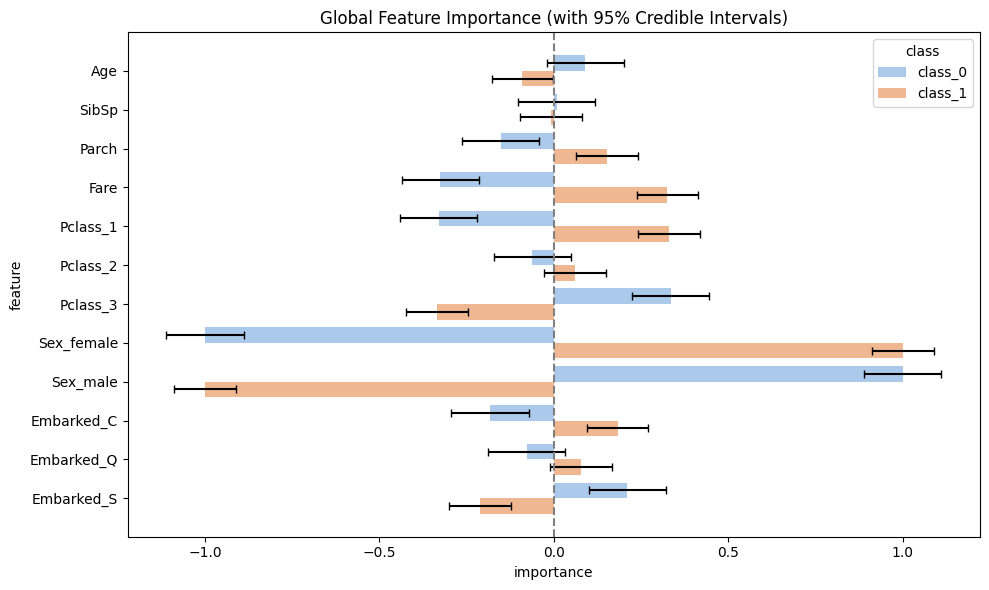

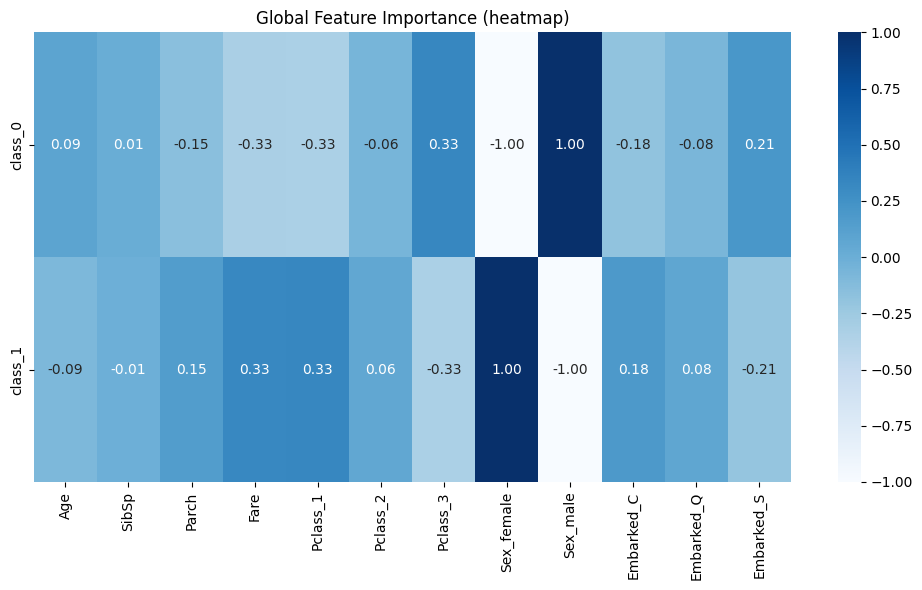

In [38]:
global_importance_df = explainer.global_feature_importance(feature_names=movie_titanic.columns.values)

In [39]:
global_importance_df

Age                        Embarked_C                       \
        lower_bound      mean upper_bound lower_bound     mean upper_bound   
class_0   -0.020574  0.090021    0.200615   -0.293445 -0.18285   -0.072256   
class_1   -0.178467 -0.090021   -0.001574    0.094404  0.18285    0.271296   

         Embarked_Q                       Embarked_S  ...    Pclass_3  \
        lower_bound     mean upper_bound lower_bound  ... upper_bound   
class_0   -0.188425 -0.07783    0.032764    0.100274  ...    0.445461   
class_1   -0.010616  0.07783    0.166276   -0.299315  ...   -0.246420   

         Sex_female                     Sex_male                        SibSp  \
        lower_bound mean upper_bound lower_bound mean upper_bound lower_bound   
class_0   -1.110594 -1.0   -0.889406    0.889406  1.0    1.110594   -0.102676   
class_1    0.911554  1.0    1.088446   -1.088446 -1.0   -0.911554   -0.096365   

                               
             mean upper_bound  
class_0  0.007919    0.118513  
class_1 -0.007919    0.080528  

[2 rows x 36 columns]

### Local feature importance

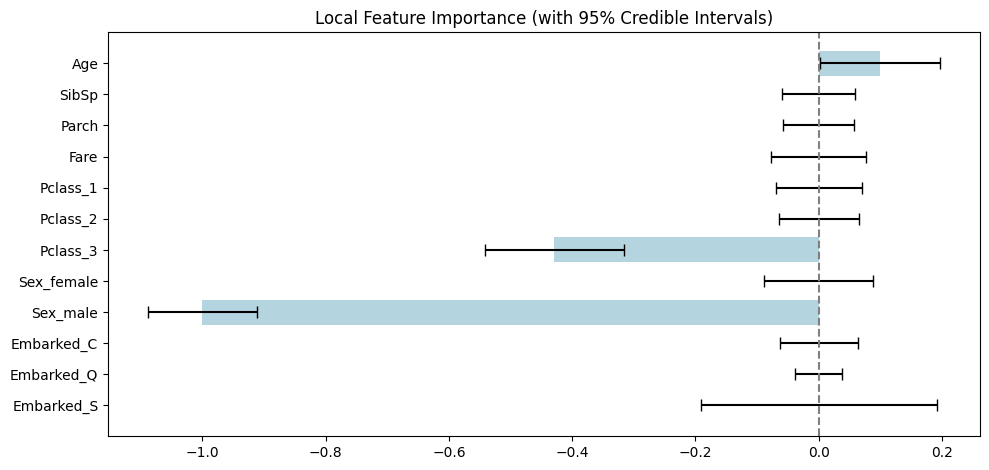

In [40]:
local_importance_df = explainer.local_feature_importance(movie_titanic.loc['Jack'].values, [0, 1], feature_names=movie_titanic.columns.values, ignore_zero_features=True)

In [41]:
local_importance_df

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
mean,0.099488,0.0,-0.0,-0.0,-0.0,-0.0,-0.428673,-0.0,-1.000000,-0.0,-0.0,0.0
lower_bound,0.001740,-0.0,-0.0,-0.0,-0.0,-0.0,-0.541896,-0.0,-1.088446,-0.0,-0.0,0.0
upper_bound,0.197235,0.0,-0.0,-0.0,-0.0,0.0,-0.315450,-0.0,-0.911554,-0.0,0.0,0.0


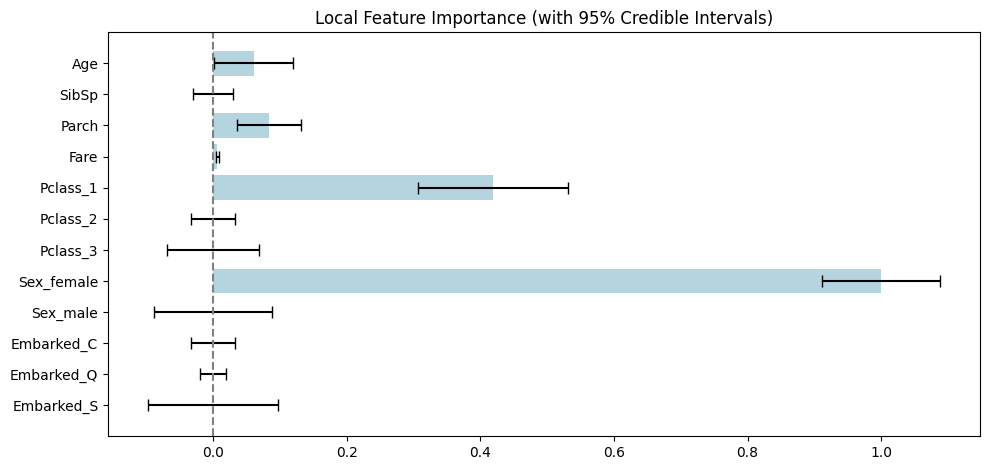

In [42]:
local_importance_df = explainer.local_feature_importance(movie_titanic.loc['Rose'].values, [0, 1], feature_names=movie_titanic.columns.values, ignore_zero_features=True)

In [43]:
local_importance_df

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
mean,0.060687,0.0,0.083748,0.006516,0.418573,-0.0,0.0,1.000000,0.0,-0.0,-0.0,0.0
lower_bound,0.001061,-0.0,0.035254,0.004746,0.306576,-0.0,0.0,0.911554,0.0,-0.0,-0.0,0.0
upper_bound,0.120313,0.0,0.132242,0.008286,0.530569,0.0,0.0,1.088446,0.0,-0.0,0.0,0.0
